In [1]:
import tensorflow as tf
from model import Model
from PIL import Image
%pylab inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
path1='/mnt/c/Users/zding/Pictures/spartan/data/'
path_to_image_files = [path1+'ocr/31.jpg',path1+'ocr/1299.png',path1+'ocr/95.jpg',path1+'ocr/96.png'
                       , path1+'ocr/52.png',path1+'ocr/421.png',path1+'ocr/1_13-crop0_2.jpg',path1+'ocr/2_63-crop0(2).jpg'
                       ,path1+'ocr/1_13-crop0.jpg',path1+'ocr/2_63-crop0.jpg', path1+'ocr/10_73-crop0(2).jpg']
images = []
for path_to_image_file in path_to_image_files:
#     img= Image.open(path_to_image_file)
#     img = img.resize((64, 64), Image.ANTIALIAS)
    image = tf.image.decode_jpeg(tf.read_file(path_to_image_file), channels=3)
    image = tf.image.resize_images(image, [64,64])
    image = tf.reshape(image, [64, 64, 3])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = image/255.0
    image = tf.multiply(tf.subtract(image, 0.5), 2)
    image = tf.image.resize_images(image, [54, 54])
    images.append(image)
images = tf.stack(images)


In [3]:
length_logits, digits_logits = Model.inference(images, drop_rate=0.0)
length_predictions = tf.argmax(length_logits, axis=1)
digits_predictions = tf.argmax(digits_logits, axis=2)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [4]:
sess = tf.InteractiveSession()

In [5]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint(path1)
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from /mnt/c/Users/zding/Pictures/spartan/data/latest.ckpt


In [6]:
length_predictions_val, digits_predictions_string_val, images_val = sess.run([length_predictions, digits_predictions_string, images])
images_val = (images_val / 2.0) + 0.5

length: 4
digits: b'144710'


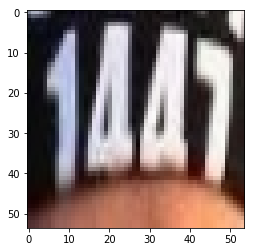

In [11]:
idx = 10
image_val = images_val[idx]
length_prediction_val = length_predictions_val[idx]
digits_prediction_string_val = digits_predictions_string_val[idx]
imshow(images_val[idx])
print ('length: %d' % length_prediction_val)
print ('digits: %s' % digits_prediction_string_val)

In [15]:
images_val.shape

(5, 54, 54, 3)

In [24]:
sess.close()

In [10]:
images_val[idx].shape

(54, 54, 3)

In [16]:
path1='/mnt/c/Users/zding/Pictures/spartan/data/ocr/'
names = ['31.png'
                       , '52.png','421.png'
                       ,'1_13-crop0.jpg','2_63-crop0.jpg']
for path_to_image_file in names:
    img= Image.open(path1+path_to_image_file)
    img = img.resize((64, 64), Image.ANTIALIAS)
    img.save(path1+'64'+path_to_image_file, 'JPEG')

In [7]:
for v in sess.graph.get_operations():
    print(v.name)

ReadFile/filename
ReadFile
DecodeJpeg
Reshape/shape
Reshape
convert_image/Cast
convert_image/y
convert_image
Sub/y
Sub
Mul/y
Mul
ExpandDims/dim
ExpandDims
size
ResizeBilinear
Squeeze
ReadFile_1/filename
ReadFile_1
DecodeJpeg_1
Reshape_1/shape
Reshape_1
convert_image_1/Cast
convert_image_1/y
convert_image_1
Sub_1/y
Sub_1
Mul_1/y
Mul_1
ExpandDims_1/dim
ExpandDims_1
size_1
ResizeBilinear_1
Squeeze_1
ReadFile_2/filename
ReadFile_2
DecodeJpeg_2
Reshape_2/shape
Reshape_2
convert_image_2/Cast
convert_image_2/y
convert_image_2
Sub_2/y
Sub_2
Mul_2/y
Mul_2
ExpandDims_2/dim
ExpandDims_2
size_2
ResizeBilinear_2
Squeeze_2
ReadFile_3/filename
ReadFile_3
DecodeJpeg_3
Reshape_3/shape
Reshape_3
convert_image_3/Cast
convert_image_3/y
convert_image_3
Sub_3/y
Sub_3
Mul_3/y
Mul_3
ExpandDims_3/dim
ExpandDims_3
size_3
ResizeBilinear_3
Squeeze_3
ReadFile_4/filename
ReadFile_4
DecodeJpeg_4
Reshape_4/shape
Reshape_4
convert_image_4/Cast
convert_image_4/y
convert_image_4
Sub_4/y
Sub_4
Mul_4/y
Mul_4
ExpandDims_4/